In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
print("Size of the data is, ", df.shape)
df.head()

#Reshape it with only needed elements
df=df[['ProductId','Text','Score']]
df['ProductId'] = df['ProductId']
df['General Review'] = df['Text']
df['Rate'] = df['Score']
df.drop(['ProductId','Text','Score'],axis=1,inplace=True)
print("Size of the data after drop, ", df.shape)
df.head()

Size of the data is,  (568454, 10)
Size of the data after drop,  (568454, 2)


,General Review,Rate
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [3]:
df_filter = df[df["Rate"]!=3].copy() #filter so the rate 3 data does not exist
print("Size of data after filtering Score 3, ",df_filter.shape)
df.head()

Size of data after filtering Score 3,  (525814, 2)


,General Review,Rate
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [4]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

df_filter["Binary_Identify"]  = df_filter["Rate"].apply(lambda x : 1 if x > 3 else 0)
df_filter.drop(['Rate'],axis=1,inplace=True)
print("Ratio of 0 and 1 as for Binary_Identification, ", df_filter["Binary_Identify"].value_counts(normalize=True))
df_filter.head()

Ratio of 0 and 1 as for Binary_Identification,  1    0.843981
0    0.156019
Name: Binary_Identify, dtype: float64


,General Review,Binary_Identify
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


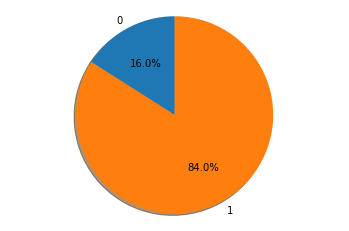

In [5]:
#visualization of data
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Pie chart to check the estimated ratio of sentiments(0 or 1)
labels = '0', '1'
sizes = [16,84]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [6]:
#Tokenization for preprocessing text
